In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [22]:
imPath = '../Images/cats.png'
img = cv2.imread(imPath);
grayImg = '../Images/albert-einstein_gray.jpg'
I_gray = cv2.imread(grayImg, cv2.IMREAD_GRAYSCALE)

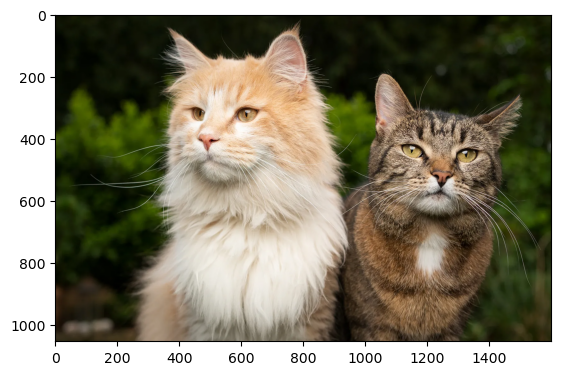

In [5]:
plt.imshow(img[:,:,::-1]);

In [19]:
E = cv2.Canny(img,200,250)

(-0.5, 1599.5, 1053.5, -0.5)

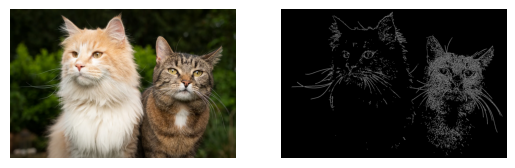

In [20]:
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(E, cmap= 'gray')
plt.axis('off')

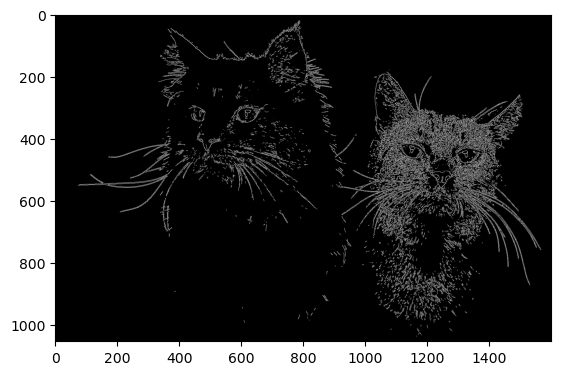

In [21]:
plt.imshow(E, cmap= 'gray')

In [31]:
E = cv2.Canny(I_gray,100,110)

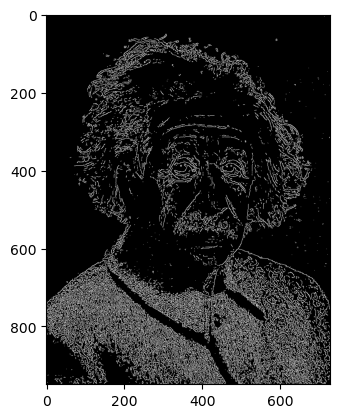

In [32]:
plt.imshow(E, cmap= 'gray')

In [35]:
x = -1
y = -1
sigma = 1
# Equation for gaussian smoothing filter for particular coordinate
v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))

In [36]:
v

0.05854983152431917

In [37]:
x = -1
y = 1
sigma = 1
# Equation for gaussian smoothing filter for particular coordinate
v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
v

0.05854983152431917

In [38]:
x = 0
y = 0
sigma = 1
# Equation for gaussian smoothing filter for particular coordinate
v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
v

0.15915494309189535

In [39]:
x = 0
y = -1
sigma = 1
# Equation for gaussian smoothing filter for particular coordinate
v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
v

0.09653235263005391

## Sigma Value small means extreme high slope of the filter (more influence of center) 
# Sigma value large means lower sloper of the filters (more influence of neighbors)

# Filter size is 3*sigma to cover total area under curve

# Implementation of Gaussian Mask

In [41]:
def f_getGaussianFilter(s,sigma) :
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    G = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            G[x-minX,y-minY] = v
    return G

In [59]:
# Window size needs to be sigma*6 - 1
G = f_getGaussianFilter(17,3)

In [60]:
# Want sum of 1
np.sum(G)

0.9911784121046245

In [71]:
a = cv2.getGaussianKernel(11,2)
G2 = a.dot(a.T)
G2

array([[7.76553851e-05, 2.39195426e-04, 5.73799997e-04, 1.07199952e-03,
        1.55975010e-03, 1.76742842e-03, 1.55975010e-03, 1.07199952e-03,
        5.73799997e-04, 2.39195426e-04, 7.76553851e-05],
       [2.39195426e-04, 7.36773780e-04, 1.76742842e-03, 3.30199100e-03,
        4.80436855e-03, 5.44406279e-03, 4.80436855e-03, 3.30199100e-03,
        1.76742842e-03, 7.36773780e-04, 2.39195426e-04],
       [5.73799997e-04, 1.76742842e-03, 4.23984037e-03, 7.92106463e-03,
        1.15250810e-02, 1.30596277e-02, 1.15250810e-02, 7.92106463e-03,
        4.23984037e-03, 1.76742842e-03, 5.73799997e-04],
       [1.07199952e-03, 3.30199100e-03, 7.92106463e-03, 1.47984970e-02,
        2.15316860e-02, 2.43985967e-02, 2.15316860e-02, 1.47984970e-02,
        7.92106463e-03, 3.30199100e-03, 1.07199952e-03],
       [1.55975010e-03, 4.80436855e-03, 1.15250810e-02, 2.15316860e-02,
        3.13284183e-02, 3.54997488e-02, 3.13284183e-02, 2.15316860e-02,
        1.15250810e-02, 4.80436855e-03, 1.55975010e-

(-0.5, 1599.5, 1053.5, -0.5)

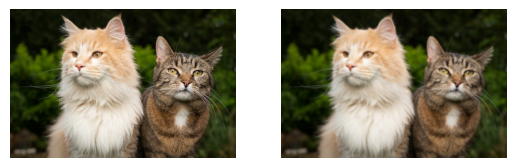

In [72]:
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(img_S[:,:,::-1], cmap= 'gray')
plt.axis('off')

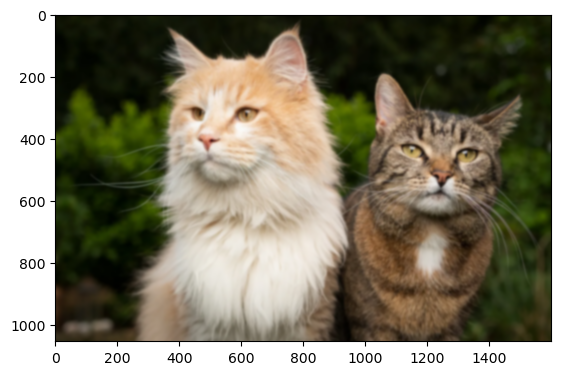

In [73]:
# Image Smoothed! (Step 1)
img_S = cv2.filter2D(img,-1,G)
plt.imshow(img_S[:,:,::-1])

# Implementing Gradients (x,y)

In [86]:
mask_x = np.zeros((2,1))
mask_x[0] = -1
mask_x[1] = 1 

mask_y = mask_x.T

In [93]:
img_S = np.float64(img_S)
Ix = cv2.filter2D(img_S[:,:,0],-1,mask_x)
Ix.shape
Iy = cv2.filter2D(img_S[:,:,0],-1,mask_y)
Iy.shape

(1054, 1600)

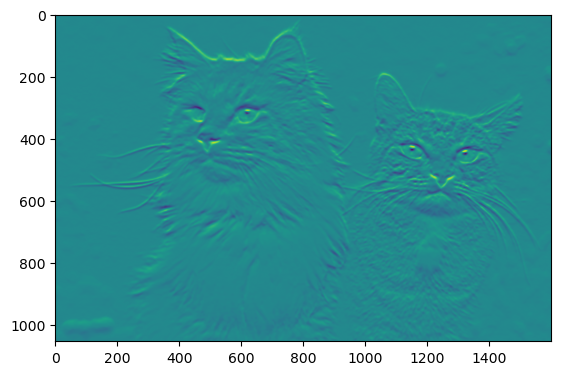

In [94]:
plt.imshow(Ix)

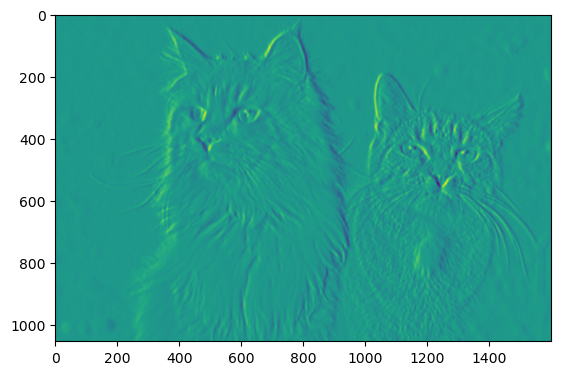

In [95]:
plt.imshow(Iy)

(-0.5, 1599.5, 1053.5, -0.5)

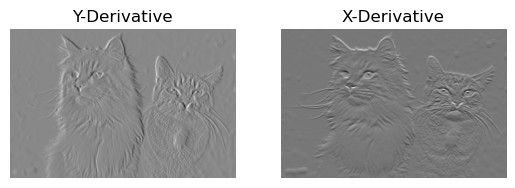

In [96]:
plt.subplot(121)
plt.imshow(Iy, cmap= 'gray')
plt.title('Y-Derivative')
plt.axis('off')
plt.subplot(122)
plt.imshow(Ix, cmap= 'gray')
plt.title('X-Derivative')
plt.axis('off')

In [97]:
gv = np.array([Ix[150,3], Iy[150,3]])
gv

array([0., 1.])

In [99]:
def Gx(s,sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    Gx = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (-x/(2*np.pi*(sigma**4)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gx[x-minX,y-minY] = v
    return Gx

def Gy(s,sigma) :
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    Gy = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            v = (-y/(2*np.pi*(sigma**4)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gy[x-minX,y-minY] = v
    return Gy

In [100]:
gx = Gx(11,2)
gy = Gy(11,2)

# Applying DOG (Derivative of Gaussian Filter)

In [102]:
img = np.float64(img[:,:,0])

In [105]:
Ix = cv2.filter2D(img,-1,gx)
Iy = cv2.filter2D(img,-1,gy)

(-0.5, 1599.5, 1053.5, -0.5)

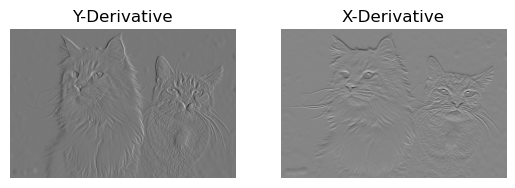

In [106]:
plt.subplot(121)
plt.imshow(Iy, cmap= 'gray')
plt.title('Y-Derivative')
plt.axis('off')
plt.subplot(122)
plt.imshow(Ix, cmap= 'gray')
plt.title('X-Derivative')
plt.axis('off')

In [107]:
Gm = (Ix**2 + Iy**2)**.5
Gd = np.rad2deg(np.arctan2(Iy,Ix))

In [108]:
Gd.min(),Gd.max()

(-180.0, 180.0)

In [109]:
Gm.min(),Gm.max()

(0.0, 38.515968271752264)

(-0.5, 1599.5, 1053.5, -0.5)

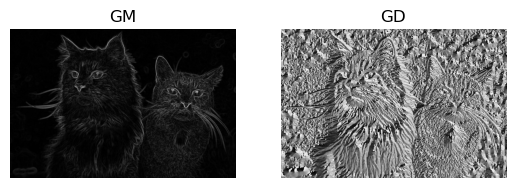

In [110]:
plt.subplot(121)
plt.imshow(Gm, cmap= 'gray')
plt.title('GM')
plt.axis('off')
plt.subplot(122)
plt.imshow(Gd, cmap= 'gray')
plt.title('GD')
plt.axis('off')

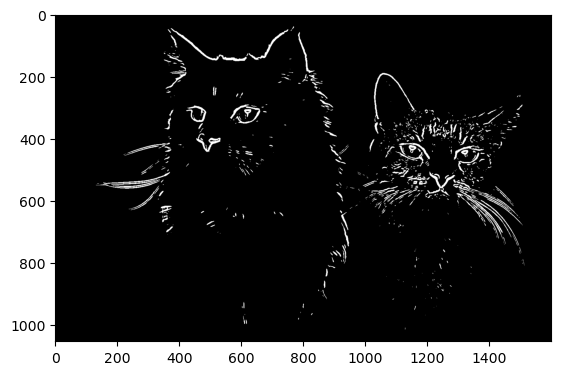

In [118]:
plt.imshow(Gm>10,cmap='gray')

(array([170599., 167993., 177207., 171234., 168811., 164273., 159872.,
        176991., 168038., 161382.]),
 array([-180., -144., -108.,  -72.,  -36.,    0.,   36.,   72.,  108.,
         144.,  180.]),
 <BarContainer object of 10 artists>)

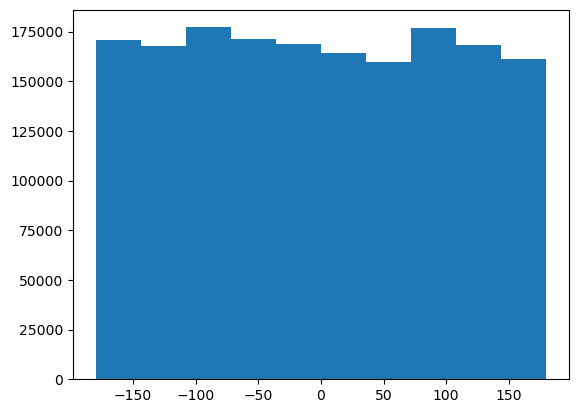

In [120]:
plt.hist(Gd.flatten())

# Quantizing Gradient Direction

In [121]:
bins = np.array([-180.,-135.,-90.,-45.,0.,45.,90.,135.,180.])

In [123]:
# Want to replace all gradient directions with one of bin values
inds = np.digitize(Gd,bins)-1
Gd_bin = bins[inds.flatten()].reshape(Gd.shape)

In [127]:
i,j = 80,150
Gd[i,j],Gd_bin[i,j]

(18.520325128849, 0.0)

In [130]:
A = np.array([134,179,-33,-180])
inds = np.digitize(A,bins)-1
bins[inds]

array([  90.,  135.,  -45., -180.])

In [131]:
A = np.array([180,134,179,135,-33,180])
A_bin = 45*(np.round(A/45))

In [132]:
A_bin

array([180., 135., 180., 135., -45., 180.])

In [133]:
Gd_bin = 45*(np.round(Gd/45))

In [137]:
i,j = 34,150
Gd[i,j],Gd_bin[i,j]

(134.3821810936132, 135.0)

# Non-Maxima Suppression

In [138]:
def NMS(Gm,Gd):
    Gd_bin = 45*(np.round(Gd/45))
    Gm_NMS = np.zeros(Gm.shape)
    numRows,numCols = Gm.shape[0],Gm.shape[1]
    a,b=0.,0.
    for r in range(1,numRows-1):
        for c in range(1,numCols-1):
            ang = Gd_bin[r,c]
            if ang == 180. or ang == -180. or ang == 0. or ang == -0.0:
                a,b = Gm[r-1,c], Gm[r+1,c]
            elif ang == 45. or ang == -135:
                a,b = Gm[r+1,c+1], Gm[r-1,c-1]
            elif ang ==90. or ang == -90.:
                a,b = Gm[r,c-1], Gm[r,c+1]
            elif ang ==135. or ang == -45.:
                a,b = Gm[r-1,c+1], Gm[r+1,c-1]
            else:
                print('Error')
                return
            if Gm[r,c] > a and Gm[r,c] >= b:
                Gm_NMS[r,c] = Gm[r,c]
    return Gm_NMS

In [139]:
Gm_NMS = NMS(Gm,Gd)

(-0.5, 1599.5, 1053.5, -0.5)

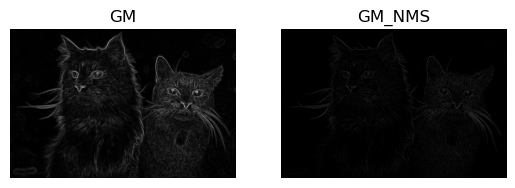

In [140]:
plt.subplot(121)
plt.imshow(Gm, cmap= 'gray')
plt.title('GM')
plt.axis('off')
plt.subplot(122)
plt.imshow(Gm_NMS, cmap= 'gray')
plt.title('GM_NMS')
plt.axis('off')

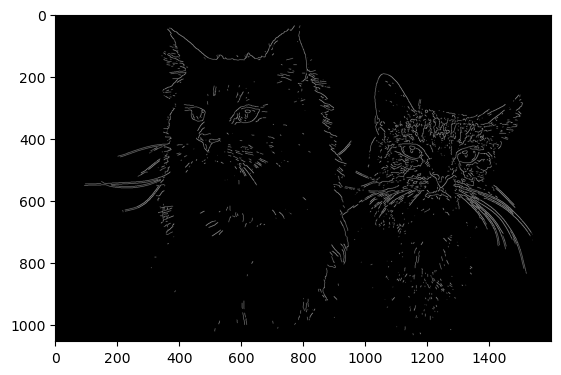

In [144]:
plt.imshow(Gm_NMS>8,cmap='gray')

# Hysteresis Thresholding

In [145]:
from skimage import filters

In [146]:
L = Gm_NMS.mean()
H = L + Gm_NMS.std()
E = filters.apply_hysteresis_threshold(Gm_NMS, L, H)

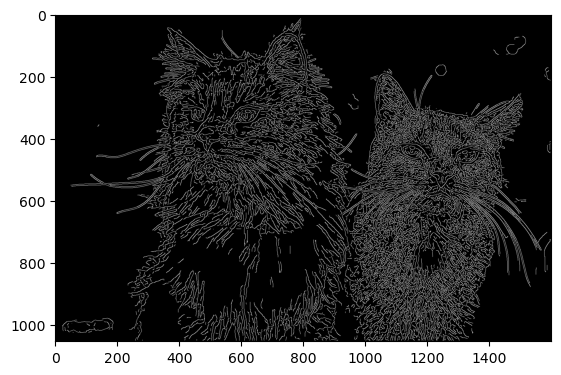

In [147]:
plt.imshow(E,cmap='gray')